In [1]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

from skimage import util, exposure, color

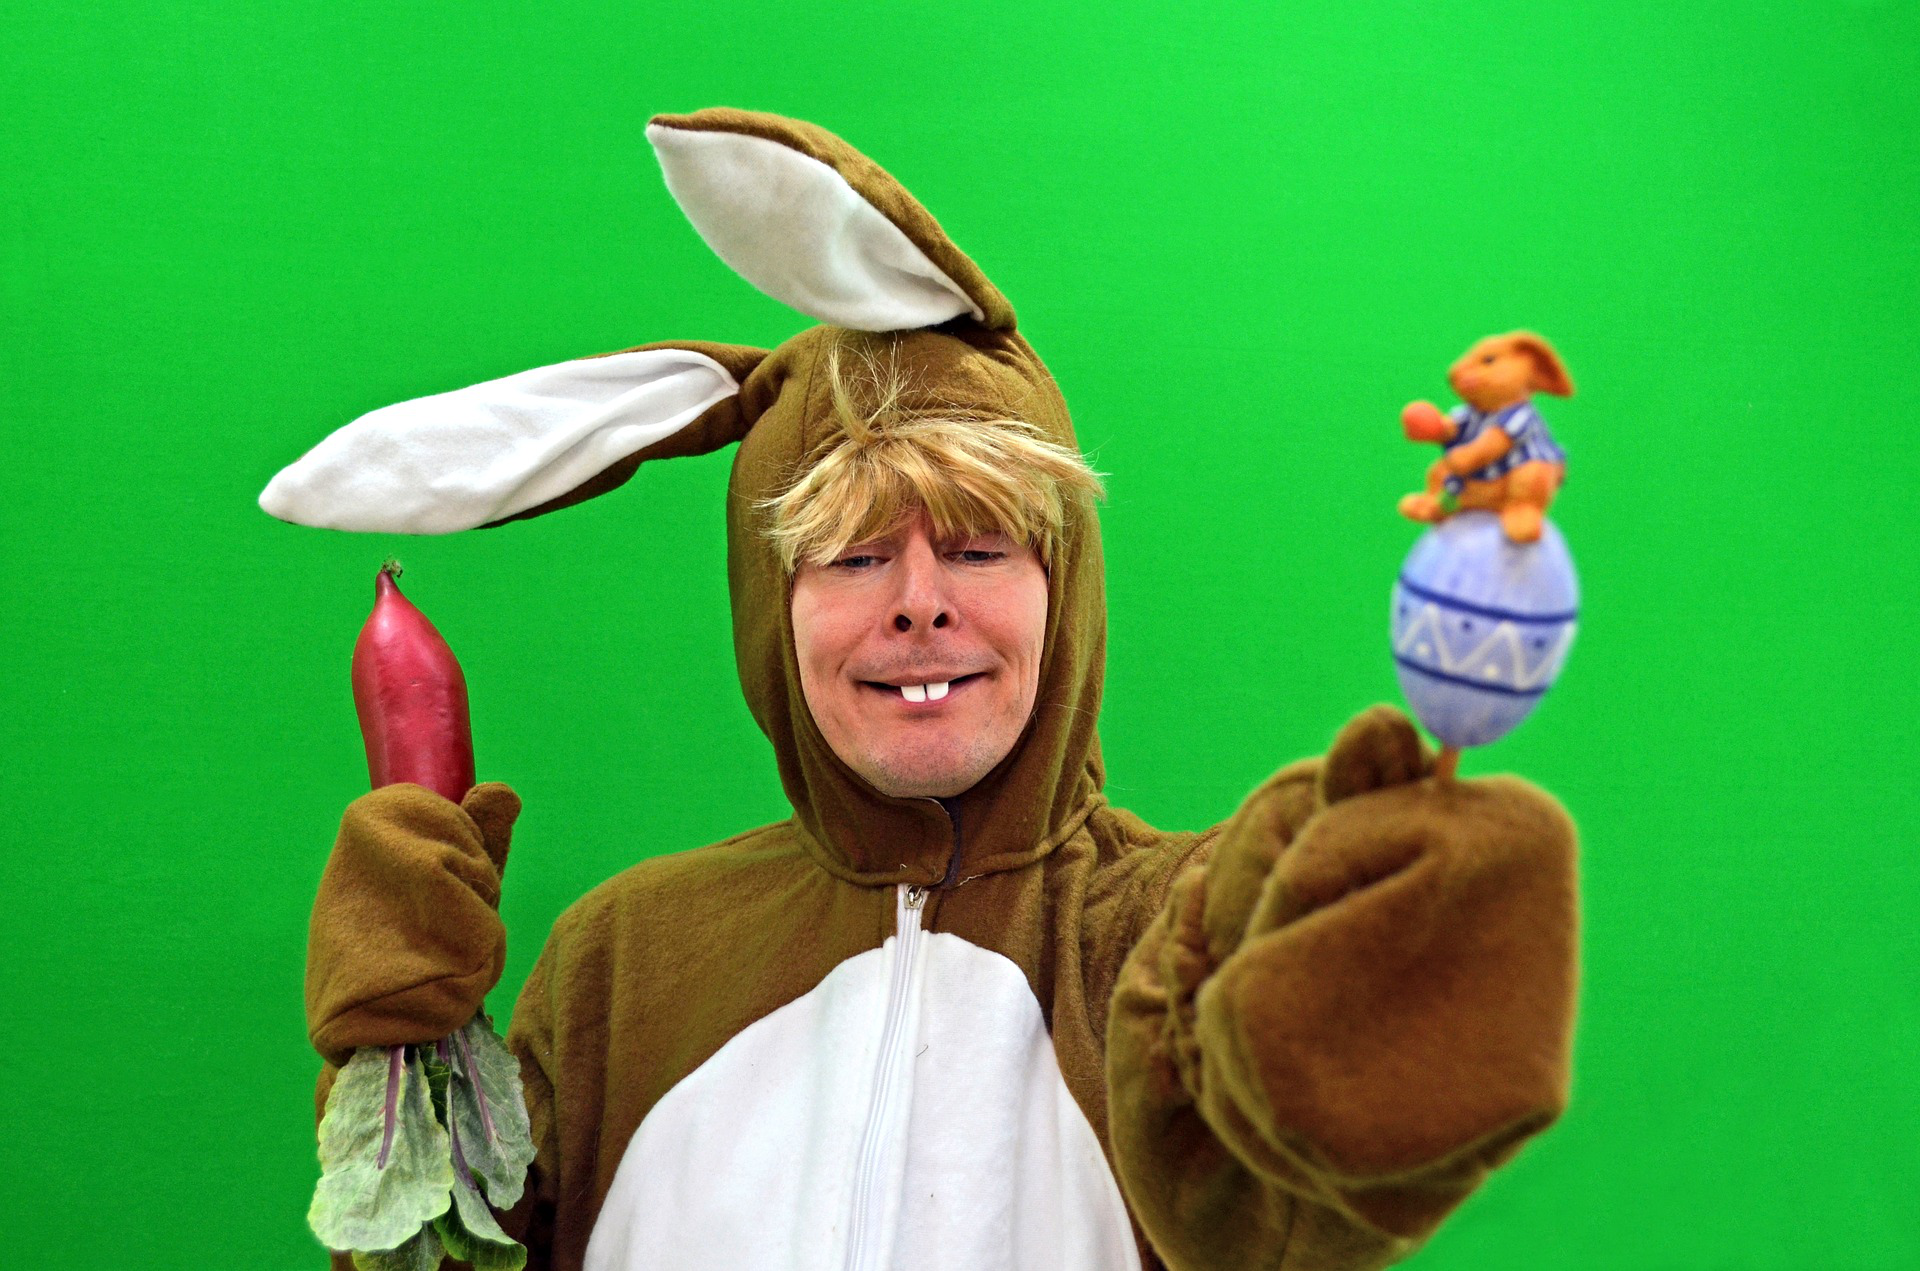

In [2]:
file = 'images/chroma-key-2096587_1920.jpg'
img  = Image.open(file)

display(img)

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (1271, 1920, 3)
Númro de píxels:  7320960


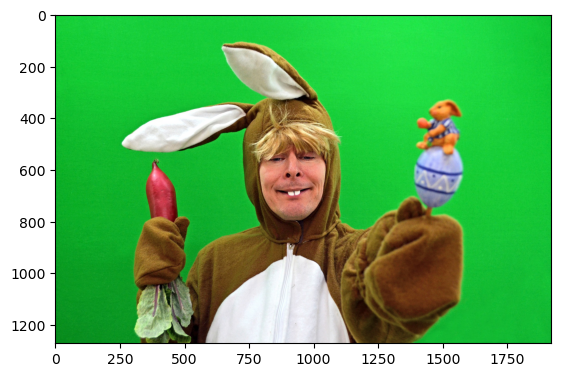

In [3]:
img_RGB = np.array(img)
print('Tipo de datos: ', img_RGB.dtype)
print('Tamaño de imagen (filas, columnas): ', img_RGB.shape)
print('Númro de píxels: ', img_RGB.size)
plt.imshow(img_RGB);

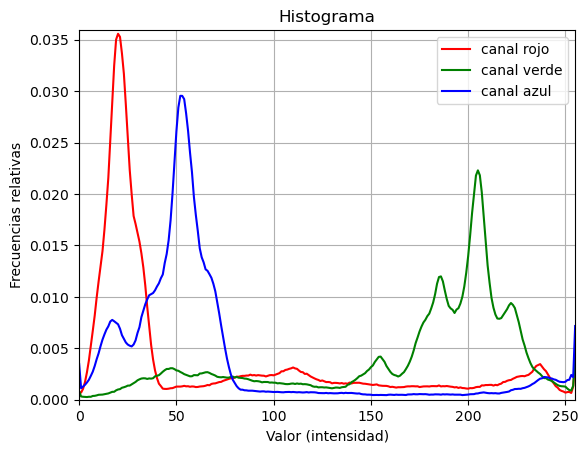

In [4]:
img_hist, bins = exposure.histogram(img_RGB, channel_axis=2, normalize=True)
M = img_hist.max()

plt.plot(bins, img_hist[0,:],'r', label='canal rojo')
plt.plot(bins, img_hist[1,:],'g', label='canal verde')
plt.plot(bins, img_hist[2,:],'b', label='canal azul')

plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.legend()
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

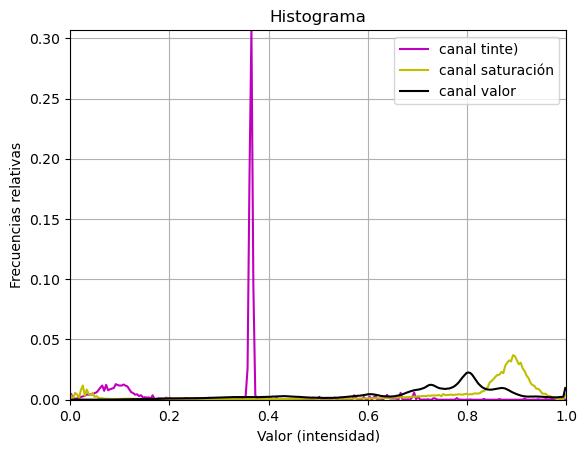

In [5]:
img_hsv = color.rgb2hsv(img_RGB)

img_hist, bins = exposure.histogram(img_hsv, channel_axis=2, normalize=True)

plt.plot(bins, img_hist[0,:],'m', label='canal tinte)')
plt.plot(bins, img_hist[1,:],'y', label='canal saturación')
plt.plot(bins, img_hist[2,:],'k', label='canal valor')

plt.axis([0,1, 0, img_hist.max()])
plt.legend()
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

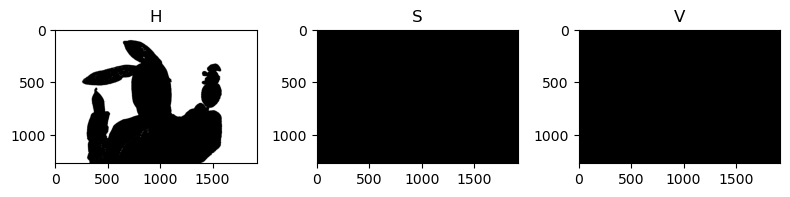

In [15]:
th_h1, th_h2 = 0.35, 0.38
th_s1, th_s2 = 0.0, 1.0 
th_v1, th_v2 = 0.0, 1.0 

mask_h = np.logical_and(img_hsv[:,:,0] >= th_h1, img_hsv[:,:,0] <= th_h2)
mask_s = np.logical_and(img_hsv[:,:,1] >= th_s1, img_hsv[:,:,1] <= th_s2)
mask_v = np.logical_and(img_hsv[:,:,2] >= th_v1, img_hsv[:,:,2] <= th_v2)

mask = np.logical_and(np.logical_and(mask_h, mask_s), mask_v)

plt.figure(figsize=(8, 4))

plt.subplot(131)
plt.imshow(mask_h, cmap='gray')
plt.title('H')

plt.subplot(132)
plt.imshow(mask_s, cmap='gray')
plt.title('S')

plt.subplot(133)
plt.imshow(mask_v, cmap='gray')
plt.title('V')

plt.tight_layout()

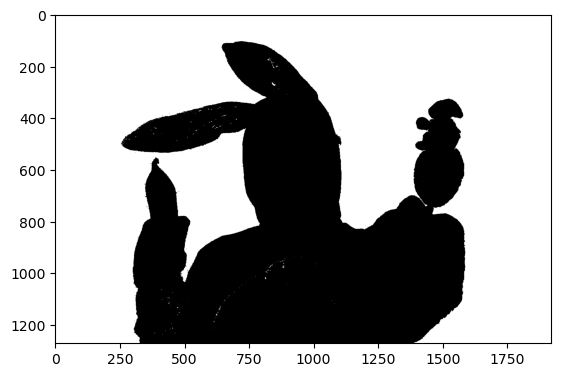

In [16]:
plt.imshow(mask,  cmap='gray')